In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [2]:
df = pd.read_excel("Mexico_GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [3]:
df.describe()                           # Exploración de datos.

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


In [15]:
cdf = df[['Periodo', 'GDP']]
cdf.head(9)

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
5,1965,2.184000e+10
6,1966,2.432000e+10
7,1967,2.656000e+10
8,1968,2.936000e+10


<function matplotlib.pyplot.show(close=None, block=None)>

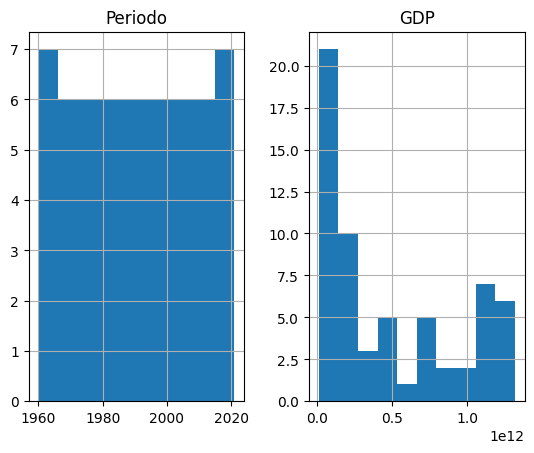

In [16]:
viz = cdf[['Periodo', 'GDP']]
viz.hist()
plt.show

In [9]:
X = df.iloc[:, 0].values.reshape(-1, 1)          # Año
y = df.iloc[:, 1].values.reshape(-1, 1)          # PIB

In [10]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

In [11]:
# Entrenar el modelo con los datos
model.fit(X, y)

LinearRegression()

In [12]:
# Imprimir los coeficientes de la regresión
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficiente: [[2.39124081e+10]]
Intercepto: [-4.71110329e+13]


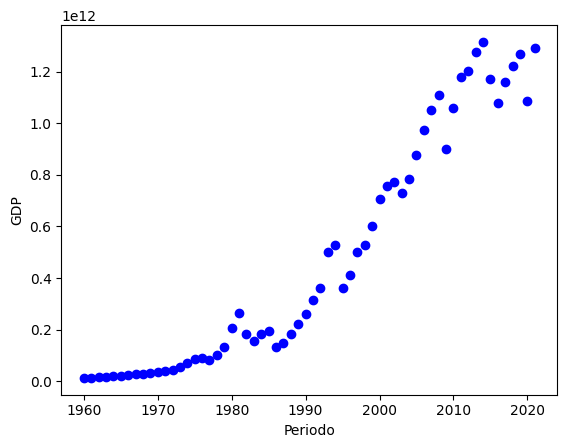

In [17]:
plt.scatter(cdf.Periodo, cdf.GDP, color = 'blue')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.show()

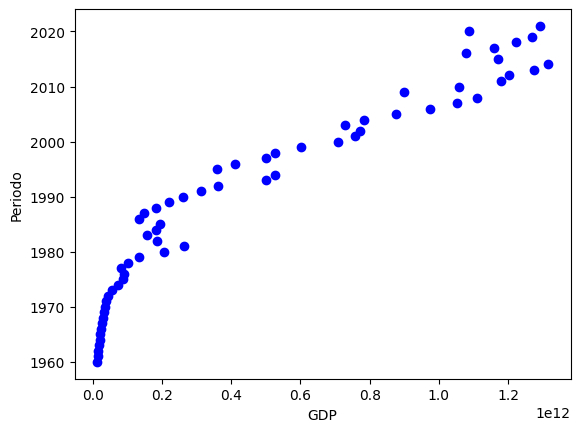

In [19]:
plt.scatter(cdf.GDP, cdf.Periodo, color = 'blue')
plt.xlabel('GDP')
plt.ylabel('Periodo')
plt.show()

In [23]:
from sklearn.preprocessing import normalize

# Normaliza los datos dividiendo cada observación entre el valor máximo de la columna
data_normalized = normalize(df[['Periodo', 'GDP']], axis=0)
data_normalized

array([[0.12504908, 0.00249659],
       [0.12511288, 0.00271102],
       [0.12517668, 0.00291014],
       [0.12524048, 0.0032471 ],
       [0.12530428, 0.00384445],
       [0.12536808, 0.00418141],
       [0.12543188, 0.00465622],
       [0.12549568, 0.00508508],
       [0.12555948, 0.00562116],
       [0.12562328, 0.00621851],
       [0.12568708, 0.00680054],
       [0.12575088, 0.0075051 ],
       [0.12581468, 0.00865383],
       [0.12587849, 0.01058372],
       [0.12594229, 0.01378487],
       [0.12600609, 0.01684817],
       [0.12606989, 0.0170446 ],
       [0.12613369, 0.01566385],
       [0.12619749, 0.01962429],
       [0.12626129, 0.02576266],
       [0.12632509, 0.03927521],
       [0.12638889, 0.05053673],
       [0.12645269, 0.03534463],
       [0.12651649, 0.0298977 ],
       [0.12658029, 0.03527806],
       [0.12664409, 0.0373761 ],
       [0.12670789, 0.02576049],
       [0.12677169, 0.02824763],
       [0.12683549, 0.03477071],
       [0.12689929, 0.0423886 ],
       [0.

In [24]:
# Separa los datos normalizados en X (Periodo) y y (PIB)

X_normalized = data_normalized[:, 0].reshape(-1, 1)  # Año
y_normalized = data_normalized[:, 1].reshape(-1, 1)  # PIB

In [25]:
# Crea un modelo de regresión lineal
model_normalized = LinearRegression()

In [26]:
# Entrena el modelo con los datos normalizados
model_normalized.fit(X_normalized, y_normalized)

LinearRegression()

In [27]:
# Imprime los coeficientes de la regresión
print('Coeficiente:', model_normalized.coef_)
print('Intercepto:', model_normalized.intercept_)

Coeficiente: [[71.75778619]]
Intercepto: [-9.01971398]


In [30]:
# Año 2022 normalizado
year_2022_normalized = 2022 / df['Periodo'].max()

In [31]:
# Pronóstico del PIB para 2022 utilizando el modelo
gdp_2022_normalized = model_normalized.predict([[year_2022_normalized]])

In [33]:
# Desnormalizar el valor del PIB pronosticado
gdp_2022 = gdp_2022_normalized * df['GDP'].max()

In [34]:
print('El pronóstico del PIB para México en 2022 es:', gdp_2022[0][0])

El pronóstico del PIB para México en 2022 es: 82569300500408.31


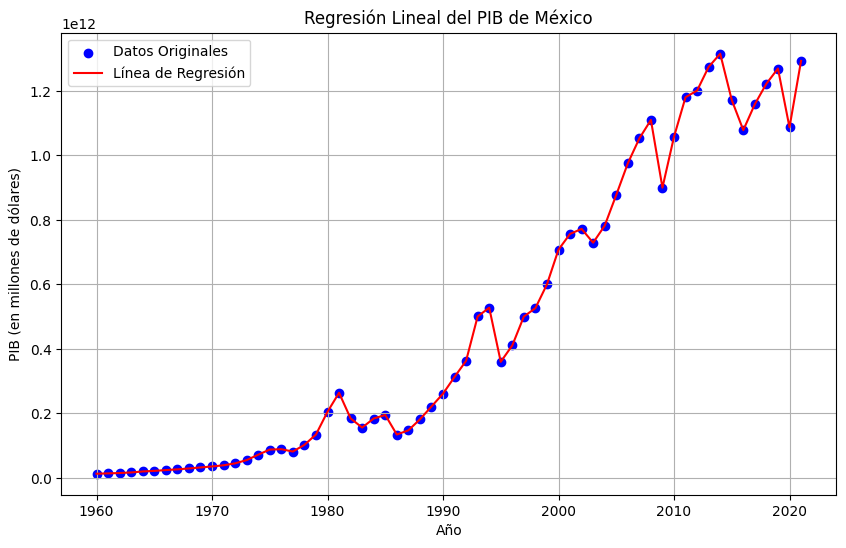

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Periodo'], df['GDP'], color='blue', label='Datos Originales')  # Datos originales
plt.plot(df['Periodo'], df['GDP'], color='red', label='Línea de Regresión')  # Línea de regresión
plt.title('Regresión Lineal del PIB de México')
plt.xlabel('Año')
plt.ylabel('PIB (en millones de dólares)')
plt.legend()
plt.grid(True)
plt.show()